In [59]:
import os
import pandas as pd

from tqdm.notebook import tqdm

In [60]:
def extractTimestepFeatures(data_features, timestep=1):
    nodes_timestep_x = data_features[data_features[1] == timestep][0]
    nodes_timestep_x = pd.DataFrame(nodes_timestep_x)
    nodes_timestep_x.columns = ["txId"]
    return nodes_timestep_x

In [61]:
def getTimestepEdgelist(nodes_timestep_x, data_edges):
    # make sure that the transactions exist in a time step
    # select only those records which transaction IDs exist in timestep1 list
    nodes_timestep_x = nodes_timestep_x["txId"].unique()
    txId1_timestep_x = []
    txId2_timestep_x = []
    for i in tqdm(range(len(data_edges))):
        if (data_edges.txId1.iloc[i] in nodes_timestep_x) & (data_edges.txId2.iloc[i] in nodes_timestep_x):
            txId1_timestep_x.append(data_edges.txId1.iloc[i])
            txId2_timestep_x.append(data_edges.txId2.iloc[i])

    data_edges_timestep_x = pd.DataFrame([txId1_timestep_x, txId2_timestep_x]).T
    data_edges_timestep_x.columns = ["txId1", "txId2"]

    return data_edges_timestep_x

In [62]:
def createNodesHeaderFile(nodes_header, output_directory="export"):
    if not os.path.isdir(output_directory):
        os.mkdir(output_directory)

    with open(f"{output_directory}/nodes_header.csv", 'w') as fh:
        fh.write(nodes_header)

In [63]:
def createNodesDataFile(data_classes, nodes_timestamp_x, output_directory="export"):

    data_classes_timestep_x = pd.merge(data_classes, nodes_timestamp_x, on="txId")
    data_classes_timestep_x["class"] = data_classes_timestep_x["class"].replace({"unknown" : 3}).astype("uint8")
    data_classes_timestep_x = data_classes_timestep_x.assign(label="node")
    data_classes_timestep_x.to_csv(f"{output_directory}/nodes_data.csv", header=False, index=False)

    return 0

In [64]:
def createEdgesHeaderFile(edges_header, output_directory="export"):
    if not os.path.isdir(output_directory):
        os.mkdir(output_directory)

    with open(f"{output_directory}/edges_header.csv", 'w') as fh:
        fh.write(edges_header)

In [65]:
def createEdgesDataFile(edgelist_timestep_x, output_directory="export"):
    # for obtaining relationship properties, the edge properties must be added using the data from the edgelist
    # the properties must be between START ID and END ID
    edges_timestep_x = edgelist_timestep_x[["txId1"]]
    edges_timestep_x = edges_timestep_x.assign(cost=1)
    edges_timestep_x = edges_timestep_x.assign(txId2=edgelist_timestep_x["txId2"])
    edges_timestep_x = edges_timestep_x.assign(Type="TRANSACTION")
    edges_timestep_x.to_csv(f"{output_directory}/edges_data.csv", header=False, index=False)

    return 0

In [66]:
def main():

    data_edges = pd.read_csv("data/elliptic_txs_edgelist.csv")
    data_features = pd.read_csv("data/elliptic_txs_features.csv", header=None)
    data_classes = pd.read_csv("data/elliptic_txs_classes.csv")

    nodes_timestep_1 = extractTimestepFeatures(data_features=data_features, timestep=1)
    createNodesHeaderFile(nodes_header="id:ID,class:int,label:LABEL", output_directory="export_timestep_1")
    createNodesDataFile(data_classes=data_classes, nodes_timestamp_x=nodes_timestep_1, output_directory="export_timestep_1")

    edgelist_timestep_1 = getTimestepEdgelist(nodes_timestep_x=nodes_timestep_1, data_edges=data_edges)
    createEdgesHeaderFile(edges_header=":START_ID,cost:int,:END_ID,:TYPE", output_directory="export_timestep_1")
    createEdgesDataFile(edgelist_timestep_1, output_directory="export_timestep_1")

    return 0

In [67]:
main()

  0%|          | 0/234355 [00:00<?, ?it/s]

0

  0%|          | 0/234355 [00:00<?, ?it/s]

0

In [77]:

dist = data_features[1].value_counts()
dist = pd.DataFrame(dist).reset_index()
dist.columns = ["TimeStep", "Size"]

In [80]:
dist["Size"].median()

4291.0

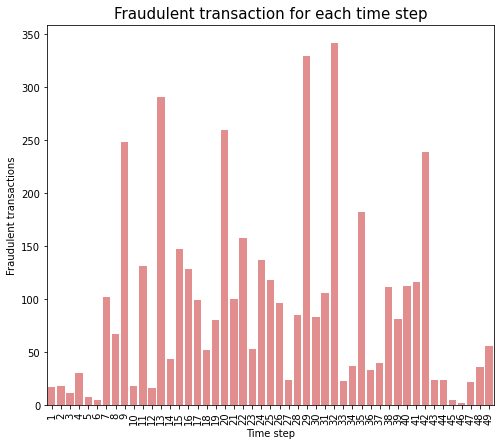

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

merged = pd.merge(data_features[[0, 1]], data_classes, left_on=0, right_on="txId")
fraud_timesteps = merged[merged["class"] == "1"][1].value_counts()
fraud_timesteps = fraud_timesteps.reset_index()
fraud_timesteps.columns = ["TimeStep", "NumberOfFraudulentTransactions"]
plt.figure(figsize=(8,7))
sns.barplot(data=fraud_timesteps.sort_values("TimeStep"),
            x="TimeStep",
            y="NumberOfFraudulentTransactions",
            color="lightcoral")
plt.xticks(rotation=90)
plt.xlabel("Time step")
plt.ylabel("Fraudulent transactions")
plt.title("Fraudulent transaction for each time step", fontsize=15)
plt.show()

In [92]:
merged = pd.merge(data_features[[0, 1]], data_classes, left_on=0, right_on="txId")
fraud_timesteps = merged[merged["class"] == "1"][1].value_counts()

In [93]:
fraud_timesteps

32    342
29    329
13    291
20    260
9     248
42    239
35    182
22    158
15    147
24    137
11    131
16    128
25    118
41    116
40    112
38    111
31    106
7     102
21    100
17     99
26     96
28     85
30     83
39     81
19     80
8      67
49     56
23     53
18     52
14     43
37     40
34     37
48     36
36     33
4      30
27     24
44     24
43     24
33     23
47     22
10     18
2      18
1      17
12     16
3      11
5       8
6       5
45      5
46      2
Name: 1, dtype: int64